In [3]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset 1

In [4]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.values

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [5]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [6]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.values, axis=0)
Day = np.concatenate(Day.values, axis=0)
bkp_start_time = np.concatenate(bkp_start_time.values, axis=0)
workflow_ID = np.concatenate(workflow_ID.values, axis=0)
File_name = np.concatenate(File_name.values, axis=0)
bkp_size = np.concatenate(bkp_size.values, axis=0)
bkp_time = np.concatenate(bkp_time.values, axis=0)


In [7]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [8]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

In [9]:
def sum_days(w, indices):
    summed = []
    new_indices = []
    sum_ = 0
    current_i = None
    for idx, i in enumerate(indices):
        if current_i != i:
            if current_i is not None:
                summed.append(sum_)
                new_indices.append(current_i)
                
            current_i = int(i)
            sum_ = w[idx]
        else:
            # current i matches, sum them
            sum_ += w[idx]
            
    return summed, new_indices

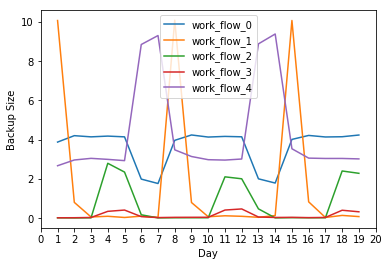

In [10]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])

summed, new_indices = sum_days(w_0, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

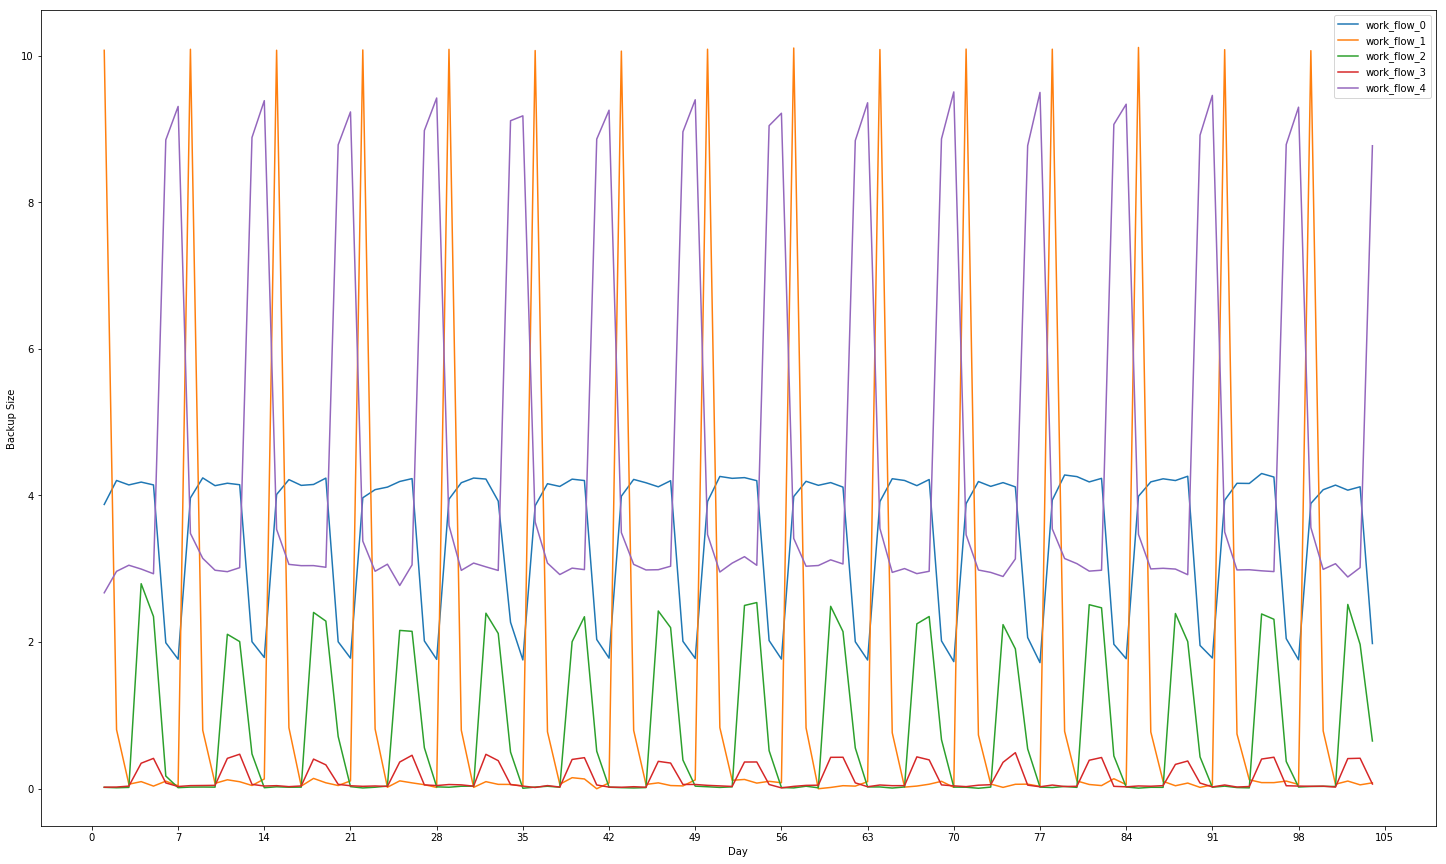

In [11]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.zeros(total_idx)
w_1 = np.zeros(total_idx)
w_2 = np.zeros(total_idx)
w_3 = np.zeros(total_idx)
w_4 = np.zeros(total_idx)
# w_0[:] = np.nan
# w_1[:] = np.nan
# w_2[:] = np.nan
# w_3[:] = np.nan
# w_4[:] = np.nan
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = w_0[i] + bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = w_1[i] + bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = w_2[i] + bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = w_3[i] + bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = w_4[i] + bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.figure(figsize=(25,15))

summed, new_indices = sum_days(w_0[np.isfinite(w_0)], day_idx[np.isfinite(w_0)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1[np.isfinite(w_1)], day_idx[np.isfinite(w_1)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2[np.isfinite(w_2)], day_idx[np.isfinite(w_2)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3[np.isfinite(w_3)], day_idx[np.isfinite(w_3)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4[np.isfinite(w_4)], day_idx[np.isfinite(w_4)])
plt.plot(new_indices, summed)

plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

## Scalar Encoding

In [12]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [14]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [15]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
#     rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#     rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10279611091287
RMSE Testing for fold 0 = 0.11049421417420904
RMSE Training for fold 1 = 0.10355760261357984
RMSE Testing for fold 1 = 0.10389082984078021
RMSE Training for fold 2 = 0.10345749311449018
RMSE Testing for fold 2 = 0.10477713862212636
RMSE Training for fold 3 = 0.10350770714242756
RMSE Testing for fold 3 = 0.10432859866341243
RMSE Training for fold 4 = 0.10457687485876445
RMSE Testing for fold 4 = 0.09425469988085118
RMSE Training for fold 5 = 0.10370831075679396
RMSE Testing for fold 5 = 0.10253383069075873
RMSE Training for fold 6 = 0.10327960167068981
RMSE Testing for fold 6 = 0.1063499576558485
RMSE Training for fold 7 = 0.10395547026341775
RMSE Testing for fold 7 = 0.10024872424272169
RMSE Training for fold 8 = 0.10240777815483124
RMSE Testing for fold 8 = 0.11370585679496961
RMSE Training for fold 9 = 0.10461761105795182
RMSE Testing for fold 9 = 0.09386163663605952


In [16]:
# print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
# print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))
print('Average RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
print('Average RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))

Average RMSE Training = 0.10358854461839913
Average RMSE Testing = 0.10361528118999433


#### Scatter Plots

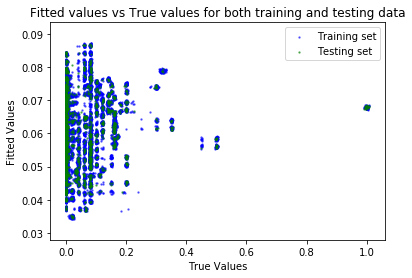

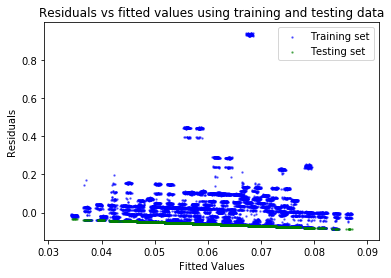

In [21]:
# reference: https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.1, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)

plt.title('Fitted values vs True values for both training and testing data')
plt.ylabel('Fitted Values')
plt.xlabel('True Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)

plt.title('Residuals vs fitted values using training and testing data')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Parameters for RadomForestRegressor
Num_trees = 20
Depth_trees = 4
Bootstrap = True
Max_features = 5

In [31]:
model = RandomForestRegressor(n_estimators = Num_trees, max_features = Max_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
num_folds = 10

Y_encoded_rf = Y_encoded.ravel()


## (2) i

In [32]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
oob_error_per_fold = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
    model.fit(X_train, y_train)
#     rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#     rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    oob_error = 1 - model.oob_score_
    oob_error_per_fold.append(oob_error)
    print('----------------------------------------------------')
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    print('Out of Bag error for fold {} = {}'.format(i, oob_error))
    print('----------------------------------------------------')
    i = i + 1

----------------------------------------------------
RMSE Training for fold 0 = 0.05908334572786052
RMSE Testing for fold 0 = 0.06326782799732346
Out of Bag error for fold 0 = 0.3310248639383937
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 1 = 0.060961040608734245
RMSE Testing for fold 1 = 0.060662669755327664
Out of Bag error for fold 1 = 0.34417955159965585
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 2 = 0.06083461602221638
RMSE Testing for fold 2 = 0.06116412690498714
Out of Bag error for fold 2 = 0.344041890352595
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 3 = 0.059655331557680595
RMSE Testing for fold 3 = 0.05840790579871094
Out of Bag error for fold 3 = 0.333414342770199
----------------------------------------------------
------

In [33]:
print('Average RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
print('Average RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
print('Average Out of Bag Error = {}'.format(np.mean(oob_error_per_fold)))

Average RMSE Training = 0.06026026784663702
Average RMSE Testing = 0.06030117676695855
Average Out of Bag Error = 0.3378958226683289


## (2) ii

In [38]:
features_array = np.arange(1,6)
trees_array = np.arange(1,201)

-----------------------------------------------------
Number of trees = 1
Number of features = 1
RMSE Training = 0.08843661050646398
RMSE Testing = 0.08970798803652984
Out of Bag error = 1.1156693347577975
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 2
Number of features = 1
RMSE Training = 0.08120593178778383
RMSE Testing = 0.0816504591402401
Out of Bag error = 0.9362823786863956
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 3
Number of features = 1
RMSE Training = 0.0794866095054806
RMSE Testing = 0.08016444648338805
Out of Bag error = 0.8295377842556364
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 1
RMSE Training = 0.0770405928840903
RMSE Testing = 0.0774619097852741
Out of Bag error = 0.7296612237000443
------------------

-----------------------------------------------------
Number of trees = 33
Number of features = 1
RMSE Training = 0.07704816473628567
RMSE Testing = 0.0772480040996747
Out of Bag error = 0.5598488049217675
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 34
Number of features = 1
RMSE Training = 0.07574592156636795
RMSE Testing = 0.07569421201708197
Out of Bag error = 0.540083820264515
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 35
Number of features = 1
RMSE Training = 0.07642278323804004
RMSE Testing = 0.07629768661699561
Out of Bag error = 0.5488817921602693
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 36
Number of features = 1
RMSE Training = 0.07563082786115238
RMSE Testing = 0.0758721126880182
Out of Bag error = 0.5385276195110268
-------------

-----------------------------------------------------
Number of trees = 65
Number of features = 1
RMSE Training = 0.07591535470114806
RMSE Testing = 0.07593049865529637
Out of Bag error = 0.5386824050513456
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 66
Number of features = 1
RMSE Training = 0.07545621573927451
RMSE Testing = 0.07565514508685238
Out of Bag error = 0.5333878312693333
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 67
Number of features = 1
RMSE Training = 0.07582506274348785
RMSE Testing = 0.07597504765066056
Out of Bag error = 0.5359897147276899
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 68
Number of features = 1
RMSE Training = 0.07546619224767347
RMSE Testing = 0.07582200638348974
Out of Bag error = 0.5317822180685084
----------

-----------------------------------------------------
Number of trees = 97
Number of features = 1
RMSE Training = 0.07554482023353608
RMSE Testing = 0.07578925459088873
Out of Bag error = 0.5321116654606934
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 98
Number of features = 1
RMSE Training = 0.07586878688129266
RMSE Testing = 0.07613043371826789
Out of Bag error = 0.5360137186112505
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 99
Number of features = 1
RMSE Training = 0.07508927150350583
RMSE Testing = 0.0754801947587643
Out of Bag error = 0.5246169115269914
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 100
Number of features = 1
RMSE Training = 0.07512616377665114
RMSE Testing = 0.07559528560413589
Out of Bag error = 0.5276637179261521
----------

-----------------------------------------------------
Number of trees = 129
Number of features = 1
RMSE Training = 0.07543771364476604
RMSE Testing = 0.0756051131120731
Out of Bag error = 0.5296155064396427
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 130
Number of features = 1
RMSE Training = 0.07547836908840981
RMSE Testing = 0.07574434823622317
Out of Bag error = 0.5299821380889685
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 131
Number of features = 1
RMSE Training = 0.07573879414885995
RMSE Testing = 0.07607898170039863
Out of Bag error = 0.5345066231563337
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 132
Number of features = 1
RMSE Training = 0.0757392663532809
RMSE Testing = 0.0759573111550867
Out of Bag error = 0.5343826146877745
---------

-----------------------------------------------------
Number of trees = 161
Number of features = 1
RMSE Training = 0.07515311566883125
RMSE Testing = 0.07546202672669035
Out of Bag error = 0.5248740038979137
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 162
Number of features = 1
RMSE Training = 0.07530452250361766
RMSE Testing = 0.07558920039026847
Out of Bag error = 0.527345057075687
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 163
Number of features = 1
RMSE Training = 0.075501094030173
RMSE Testing = 0.07566095989753992
Out of Bag error = 0.5304856961513666
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 164
Number of features = 1
RMSE Training = 0.07558236885008505
RMSE Testing = 0.07593215627752718
Out of Bag error = 0.5316668295948233
---------

-----------------------------------------------------
Number of trees = 193
Number of features = 1
RMSE Training = 0.07597313661925868
RMSE Testing = 0.07618750075877281
Out of Bag error = 0.5359866813860859
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 194
Number of features = 1
RMSE Training = 0.07533411802257613
RMSE Testing = 0.07553228726751775
Out of Bag error = 0.5283172656742774
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 195
Number of features = 1
RMSE Training = 0.0754001235487656
RMSE Testing = 0.07569141652848758
Out of Bag error = 0.528715582461526
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 196
Number of features = 1
RMSE Training = 0.07534602749029252
RMSE Testing = 0.0755872147600842
Out of Bag error = 0.528514798087219
----------

-----------------------------------------------------
Number of trees = 25
Number of features = 2
RMSE Training = 0.06372779888044063
RMSE Testing = 0.06383691181764144
Out of Bag error = 0.38883815313038345
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 26
Number of features = 2
RMSE Training = 0.064051725129823
RMSE Testing = 0.0640112291664162
Out of Bag error = 0.3900616943836643
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 27
Number of features = 2
RMSE Training = 0.06595625899145027
RMSE Testing = 0.06595510021146231
Out of Bag error = 0.414682707631297
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 28
Number of features = 2
RMSE Training = 0.06434539412189781
RMSE Testing = 0.06449371154124733
Out of Bag error = 0.39409283906855697
------------

-----------------------------------------------------
Number of trees = 57
Number of features = 2
RMSE Training = 0.06446233982613252
RMSE Testing = 0.06450294485345157
Out of Bag error = 0.389517915296349
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 58
Number of features = 2
RMSE Training = 0.06436174979276889
RMSE Testing = 0.06456021845742538
Out of Bag error = 0.38827296261643884
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 59
Number of features = 2
RMSE Training = 0.06486238184112374
RMSE Testing = 0.06494675581969772
Out of Bag error = 0.39520703956737513
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 60
Number of features = 2
RMSE Training = 0.06439405657595504
RMSE Testing = 0.0643385300064352
Out of Bag error = 0.3879857360318387
----------

-----------------------------------------------------
Number of trees = 89
Number of features = 2
RMSE Training = 0.06431175610858661
RMSE Testing = 0.06458786649046458
Out of Bag error = 0.38625147307972585
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 90
Number of features = 2
RMSE Training = 0.06392395727630391
RMSE Testing = 0.06399744351972977
Out of Bag error = 0.38178197248891443
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 91
Number of features = 2
RMSE Training = 0.06440446703338236
RMSE Testing = 0.06451619319948361
Out of Bag error = 0.38801081786009134
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 92
Number of features = 2
RMSE Training = 0.06439808737493403
RMSE Testing = 0.06458981413388214
Out of Bag error = 0.38791405925753775
------

-----------------------------------------------------
Number of trees = 121
Number of features = 2
RMSE Training = 0.06404471315959111
RMSE Testing = 0.06421795879258883
Out of Bag error = 0.3828966158990176
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 122
Number of features = 2
RMSE Training = 0.06484769958160215
RMSE Testing = 0.06515938611002915
Out of Bag error = 0.3927374847944265
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 123
Number of features = 2
RMSE Training = 0.06412072591063728
RMSE Testing = 0.06436027856614263
Out of Bag error = 0.3827501417678071
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 124
Number of features = 2
RMSE Training = 0.06482075324454441
RMSE Testing = 0.06494445728618854
Out of Bag error = 0.3918230210679096
------

-----------------------------------------------------
Number of trees = 153
Number of features = 2
RMSE Training = 0.06394980306966716
RMSE Testing = 0.0640004630730088
Out of Bag error = 0.38001466553067453
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 154
Number of features = 2
RMSE Training = 0.06406532199578055
RMSE Testing = 0.06443173803955983
Out of Bag error = 0.38248745737582157
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 155
Number of features = 2
RMSE Training = 0.06411040950499787
RMSE Testing = 0.06428934303927915
Out of Bag error = 0.3824968958825153
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 156
Number of features = 2
RMSE Training = 0.06404928323464198
RMSE Testing = 0.06427369175768789
Out of Bag error = 0.38272841278779324
----

-----------------------------------------------------
Number of trees = 185
Number of features = 2
RMSE Training = 0.06409865180632765
RMSE Testing = 0.06426680070050761
Out of Bag error = 0.3833160177823581
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 186
Number of features = 2
RMSE Training = 0.06412681759451741
RMSE Testing = 0.0642052165945078
Out of Bag error = 0.38237996581650824
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 187
Number of features = 2
RMSE Training = 0.06402958054897925
RMSE Testing = 0.06421657868140933
Out of Bag error = 0.3813698128499644
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 188
Number of features = 2
RMSE Training = 0.06401989859281194
RMSE Testing = 0.06431169774134216
Out of Bag error = 0.3812621809336064
------

-----------------------------------------------------
Number of trees = 17
Number of features = 3
RMSE Training = 0.06060059687326621
RMSE Testing = 0.06064993136237224
Out of Bag error = 0.353333528166855
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 18
Number of features = 3
RMSE Training = 0.05968949629210784
RMSE Testing = 0.05987824351454296
Out of Bag error = 0.34204259758565025
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 3
RMSE Training = 0.06075243560403618
RMSE Testing = 0.06122565094567474
Out of Bag error = 0.35300233170515183
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 20
Number of features = 3
RMSE Training = 0.060930194366959116
RMSE Testing = 0.06105500748553092
Out of Bag error = 0.3519586495967257
--------

-----------------------------------------------------
Number of trees = 49
Number of features = 3
RMSE Training = 0.06058916113315515
RMSE Testing = 0.06073221612129997
Out of Bag error = 0.34388156752872157
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 50
Number of features = 3
RMSE Training = 0.06068325884583807
RMSE Testing = 0.06087595237269173
Out of Bag error = 0.3437608111616559
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 51
Number of features = 3
RMSE Training = 0.05992237968431554
RMSE Testing = 0.06004503938641655
Out of Bag error = 0.33574331969911303
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 52
Number of features = 3
RMSE Training = 0.06025640511730056
RMSE Testing = 0.06043010900010976
Out of Bag error = 0.3404764528822636
--------

-----------------------------------------------------
Number of trees = 81
Number of features = 3
RMSE Training = 0.06047844727082092
RMSE Testing = 0.060689080041432704
Out of Bag error = 0.34093274123223677
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 82
Number of features = 3
RMSE Training = 0.060844863520719855
RMSE Testing = 0.06114217944813232
Out of Bag error = 0.3450342141024955
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 83
Number of features = 3
RMSE Training = 0.0603130756680664
RMSE Testing = 0.06051127477916972
Out of Bag error = 0.339241039796755
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 84
Number of features = 3
RMSE Training = 0.06097222628674921
RMSE Testing = 0.06108760125743899
Out of Bag error = 0.34622697645768036
--------

-----------------------------------------------------
Number of trees = 113
Number of features = 3
RMSE Training = 0.05994471608378058
RMSE Testing = 0.06006244326940083
Out of Bag error = 0.335833824812359
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 114
Number of features = 3
RMSE Training = 0.0602170992851046
RMSE Testing = 0.06052974492267882
Out of Bag error = 0.3373683304684307
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 115
Number of features = 3
RMSE Training = 0.06057639631408862
RMSE Testing = 0.06065780127251131
Out of Bag error = 0.34112662960866774
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 116
Number of features = 3
RMSE Training = 0.06024899201162674
RMSE Testing = 0.06040046536981816
Out of Bag error = 0.33801545283375045
------

-----------------------------------------------------
Number of trees = 145
Number of features = 3
RMSE Training = 0.06045137318525235
RMSE Testing = 0.06065760510275189
Out of Bag error = 0.3391443048061346
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 146
Number of features = 3
RMSE Training = 0.060207047637309524
RMSE Testing = 0.060313362531508964
Out of Bag error = 0.3376153978873557
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 147
Number of features = 3
RMSE Training = 0.06014372468170766
RMSE Testing = 0.06021570754798511
Out of Bag error = 0.3363552880186236
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 148
Number of features = 3
RMSE Training = 0.06044294734015977
RMSE Testing = 0.06055775798764067
Out of Bag error = 0.34053378255868216
---

-----------------------------------------------------
Number of trees = 177
Number of features = 3
RMSE Training = 0.06023602220606695
RMSE Testing = 0.06028546415682874
Out of Bag error = 0.3367837282098654
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 178
Number of features = 3
RMSE Training = 0.060264861772663575
RMSE Testing = 0.060524105284115066
Out of Bag error = 0.3378078407949618
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 179
Number of features = 3
RMSE Training = 0.06061207178395631
RMSE Testing = 0.06077762123636275
Out of Bag error = 0.3414315351122118
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 180
Number of features = 3
RMSE Training = 0.06032431821487868
RMSE Testing = 0.060514081331127026
Out of Bag error = 0.338066210641399
----

-----------------------------------------------------
Number of trees = 9
Number of features = 4
RMSE Training = 0.06155309709467881
RMSE Testing = 0.06173915427308016
Out of Bag error = 0.37374998790742325
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 10
Number of features = 4
RMSE Training = 0.06089181966343122
RMSE Testing = 0.060950184462221946
Out of Bag error = 0.36235636377301006
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 11
Number of features = 4
RMSE Training = 0.060980946565956616
RMSE Testing = 0.06114380653450513
Out of Bag error = 0.35693028658748444
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 12
Number of features = 4
RMSE Training = 0.06123596289139594
RMSE Testing = 0.061416688522305224
Out of Bag error = 0.3581954604788837
-----

-----------------------------------------------------
Number of trees = 41
Number of features = 4
RMSE Training = 0.060965857408614293
RMSE Testing = 0.061181711773568445
Out of Bag error = 0.34559888211890305
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 42
Number of features = 4
RMSE Training = 0.06083626560069479
RMSE Testing = 0.06086594722351528
Out of Bag error = 0.3438999550935083
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 43
Number of features = 4
RMSE Training = 0.060817326471671845
RMSE Testing = 0.061046276494013146
Out of Bag error = 0.34422714289643846
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 44
Number of features = 4
RMSE Training = 0.06062527741769485
RMSE Testing = 0.06082040004372308
Out of Bag error = 0.34192771603313166
---

-----------------------------------------------------
Number of trees = 73
Number of features = 4
RMSE Training = 0.06067923499070851
RMSE Testing = 0.06078784152197445
Out of Bag error = 0.3419292776132776
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 74
Number of features = 4
RMSE Training = 0.06089250010681
RMSE Testing = 0.060965829115060516
Out of Bag error = 0.3439139750987691
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 75
Number of features = 4
RMSE Training = 0.060796616500702325
RMSE Testing = 0.06094623465673326
Out of Bag error = 0.342644891997391
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 76
Number of features = 4
RMSE Training = 0.060939077855140175
RMSE Testing = 0.06112477595102782
Out of Bag error = 0.34440353200515383
----------

-----------------------------------------------------
Number of trees = 105
Number of features = 4
RMSE Training = 0.060908601071706786
RMSE Testing = 0.0611001914990989
Out of Bag error = 0.34418507179808316
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 106
Number of features = 4
RMSE Training = 0.060818709051205525
RMSE Testing = 0.060972822249423186
Out of Bag error = 0.3430757306375693
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 107
Number of features = 4
RMSE Training = 0.06083188694774895
RMSE Testing = 0.06093016209725539
Out of Bag error = 0.34303453124501454
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 108
Number of features = 4
RMSE Training = 0.060899434077002955
RMSE Testing = 0.061007312888037395
Out of Bag error = 0.3441471669366365


-----------------------------------------------------
Number of trees = 137
Number of features = 4
RMSE Training = 0.060857812175938705
RMSE Testing = 0.061063269932879624
Out of Bag error = 0.34325995528404196
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 138
Number of features = 4
RMSE Training = 0.060906703401479294
RMSE Testing = 0.061030210511617035
Out of Bag error = 0.3436277769588617
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 139
Number of features = 4
RMSE Training = 0.06080081755610163
RMSE Testing = 0.06095593893777953
Out of Bag error = 0.3425635418536004
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 140
Number of features = 4
RMSE Training = 0.06084020846178316
RMSE Testing = 0.060940669178944085
Out of Bag error = 0.34324168439451763

-----------------------------------------------------
Number of trees = 169
Number of features = 4
RMSE Training = 0.06081462394831932
RMSE Testing = 0.060982739387932784
Out of Bag error = 0.34282974833956137
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 170
Number of features = 4
RMSE Training = 0.06077203720178266
RMSE Testing = 0.060950747324287353
Out of Bag error = 0.34232170415889346
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 171
Number of features = 4
RMSE Training = 0.060759603582293244
RMSE Testing = 0.06095869160458408
Out of Bag error = 0.3420353485538724
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 172
Number of features = 4
RMSE Training = 0.06079234585399895
RMSE Testing = 0.06095103704790783
Out of Bag error = 0.34249139061143874


-----------------------------------------------------
Number of trees = 2
Number of features = 5
RMSE Training = 0.060837772921264105
RMSE Testing = 0.06057853341652465
Out of Bag error = 0.7564379628430126
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 3
Number of features = 5
RMSE Training = 0.06098644582152816
RMSE Testing = 0.0610096683670875
Out of Bag error = 0.6097254246745702
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 5
RMSE Training = 0.06094387861873108
RMSE Testing = 0.06098009511443691
Out of Bag error = 0.5000322293824139
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 5
Number of features = 5
RMSE Training = 0.06054353498609675
RMSE Testing = 0.060784842761212515
Out of Bag error = 0.4450369774113
----------------

-----------------------------------------------------
Number of trees = 34
Number of features = 5
RMSE Training = 0.060659994377631726
RMSE Testing = 0.06081534053458879
Out of Bag error = 0.3407621909801585
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 35
Number of features = 5
RMSE Training = 0.060553632994668725
RMSE Testing = 0.060622042988795845
Out of Bag error = 0.3399796487246432
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 36
Number of features = 5
RMSE Training = 0.060450987455062964
RMSE Testing = 0.060544359464683506
Out of Bag error = 0.33868407565346254
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 37
Number of features = 5
RMSE Training = 0.06043511417024307
RMSE Testing = 0.060578371876028256
Out of Bag error = 0.3383104728193247
---

-----------------------------------------------------
Number of trees = 66
Number of features = 5
RMSE Training = 0.060481866071726
RMSE Testing = 0.060565859687082856
Out of Bag error = 0.33863513435902143
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 67
Number of features = 5
RMSE Training = 0.06037044904697948
RMSE Testing = 0.060508398497360956
Out of Bag error = 0.337559483414226
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 68
Number of features = 5
RMSE Training = 0.060532748757018855
RMSE Testing = 0.06067253085230867
Out of Bag error = 0.3390677974342968
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 69
Number of features = 5
RMSE Training = 0.060515374287584335
RMSE Testing = 0.0606386000245385
Out of Bag error = 0.33924935592242544
--------

-----------------------------------------------------
Number of trees = 98
Number of features = 5
RMSE Training = 0.06037595522452361
RMSE Testing = 0.06051481157354061
Out of Bag error = 0.3376227377013542
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 99
Number of features = 5
RMSE Training = 0.06057614685893455
RMSE Testing = 0.06067151749372037
Out of Bag error = 0.3396263337646067
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 100
Number of features = 5
RMSE Training = 0.06045891182668874
RMSE Testing = 0.060601218977348194
Out of Bag error = 0.3383039598713534
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 101
Number of features = 5
RMSE Training = 0.06041374113716643
RMSE Testing = 0.06049611912132361
Out of Bag error = 0.33798926945251495
------

-----------------------------------------------------
Number of trees = 130
Number of features = 5
RMSE Training = 0.060362279803006506
RMSE Testing = 0.06049269979302815
Out of Bag error = 0.33738778306519074
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 131
Number of features = 5
RMSE Training = 0.06051806443248122
RMSE Testing = 0.06063626743641605
Out of Bag error = 0.3390646373102261
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 132
Number of features = 5
RMSE Training = 0.06061658067880297
RMSE Testing = 0.0607367898537381
Out of Bag error = 0.34003096674862504
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 133
Number of features = 5
RMSE Training = 0.06045501029266911
RMSE Testing = 0.060581898735376186
Out of Bag error = 0.3382907757859972
---

-----------------------------------------------------
Number of trees = 162
Number of features = 5
RMSE Training = 0.06052729720325387
RMSE Testing = 0.06065965246075698
Out of Bag error = 0.33906299395437245
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 163
Number of features = 5
RMSE Training = 0.06055639612531881
RMSE Testing = 0.06063166078230535
Out of Bag error = 0.3393966090689826
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 164
Number of features = 5
RMSE Training = 0.06046547533951462
RMSE Testing = 0.06061133222190043
Out of Bag error = 0.33839165524860493
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 165
Number of features = 5
RMSE Training = 0.06045841761714599
RMSE Testing = 0.060567075285168345
Out of Bag error = 0.3383450231700128
---

-----------------------------------------------------
Number of trees = 194
Number of features = 5
RMSE Training = 0.060489908625609844
RMSE Testing = 0.06062565381543366
Out of Bag error = 0.338528474440413
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 195
Number of features = 5
RMSE Training = 0.060469988950973226
RMSE Testing = 0.060575055011893045
Out of Bag error = 0.3384931812217327
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 196
Number of features = 5
RMSE Training = 0.06046958851281273
RMSE Testing = 0.060582054690088316
Out of Bag error = 0.3384100814221843
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 197
Number of features = 5
RMSE Training = 0.060488936227672055
RMSE Testing = 0.06058514905311759
Out of Bag error = 0.3387033250730897
--

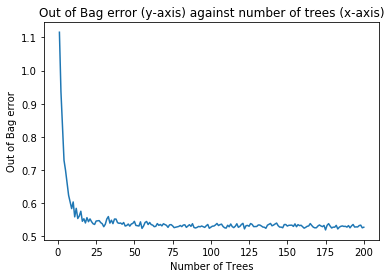

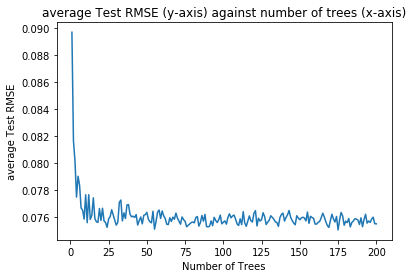

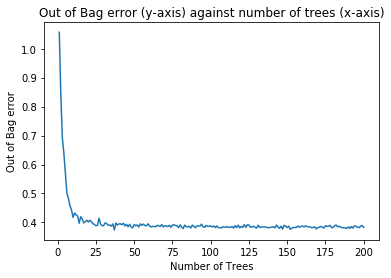

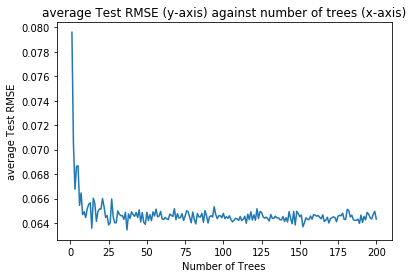

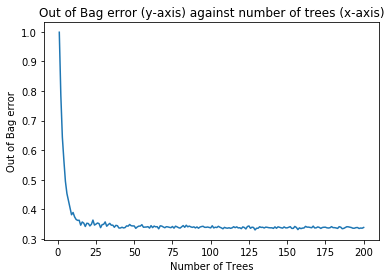

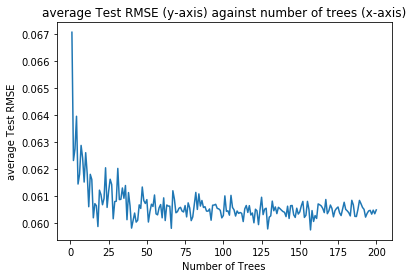

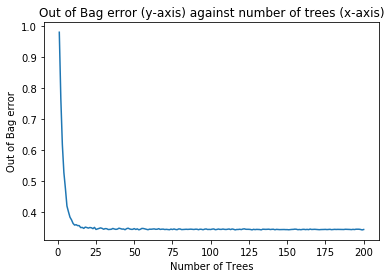

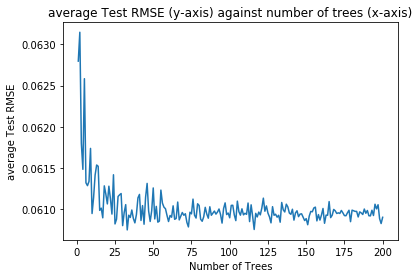

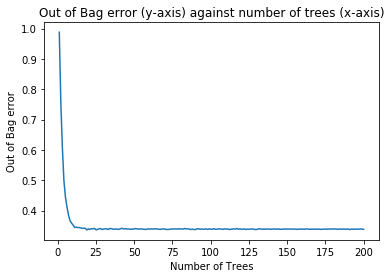

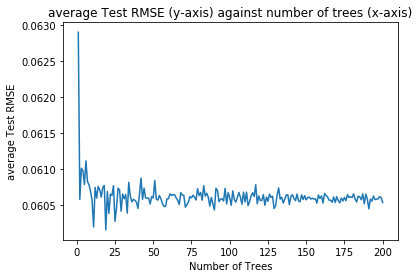

In [39]:
i = 0;
j = 0;
best1 = []
best2 = []
while i < len(features_array):
    total_rmse_per_fold_train = []
    total_rmse_per_fold_test = []
    total_oob_error_per_fold = []
    while j < len(trees_array):
        Num_trees = trees_array[j]
        Num_features = features_array[i]
        model = RandomForestRegressor(n_estimators = Num_trees, max_features = Num_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
        num_folds = 10
        kf = KFold(n_splits=num_folds)
        rmse_per_fold_train = []
        rmse_per_fold_test = []
        oob_error_per_fold = []
        k = 0
        for trainset, testset in kf.split(X_encoded):
            X_train, X_test = X_encoded[trainset], X_encoded[testset]
            y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
            model.fit(X_train, y_train)
#             rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#             rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test)))
            rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
            oob_error = 1 - model.oob_score_
            oob_error_per_fold.append(oob_error)
        total_rmse_per_fold_train.append(np.sqrt(np.mean(rmse_per_fold_train)))
        total_rmse_per_fold_test.append(np.sqrt(np.mean(rmse_per_fold_test)))
        total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
        print('-----------------------------------------------------')
        print('Number of trees = %d' % Num_trees)
        print('Number of features = %d' % Num_features)
        print('RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
        print('RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
        print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
        print('-----------------------------------------------------')
        j = j + 1
    best1.append(np.argmin(total_oob_error_per_fold))
    best2.append(np.argmin(total_rmse_per_fold_test))
    plt.figure()
    plt.plot(trees_array, total_oob_error_per_fold)
    plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('Out of Bag error')
    
    plt.figure()
    plt.plot(trees_array, total_rmse_per_fold_test)
    plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('average Test RMSE')
    j = 0
    i = i + 1

In [40]:
best1

[174, 36, 128, 198, 18]

In [41]:
best2

[174, 36, 156, 32, 18]

## (2) iii

In [34]:
depth_array = np.arange(1,41)
Best_num_features = 5
Best_num_trees = 19

-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 1
RMSE Training = 0.09747032303110377
RMSE Testing = 0.09748058407262153
Out of Bag error = 0.8754935976922299
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 2
RMSE Training = 0.08629012470272539
RMSE Testing = 0.08635291618177442
Out of Bag error = 0.6879163675355728
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 3
RMSE Training = 0.07961540975997505
RMSE Testing = 0.07968476560827593
Out of Bag error = 0.5867461207691296
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 4
RMSE Training = 0.060616342732235415
RMSE T

-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 30
RMSE Training = 0.005589158563184527
RMSE Testing = 0.014454536727290385
Out of Bag error = 0.020084847591578824
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 31
RMSE Training = 0.005592370578347447
RMSE Testing = 0.014344953762258895
Out of Bag error = 0.020006466974611215
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 32
RMSE Training = 0.005599903311043167
RMSE Testing = 0.014422182656084366
Out of Bag error = 0.020738440395323653
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 5
Depth of trees = 33
RMSE Training = 0.005556996

Text(0, 0.5, 'average Test RMSE')

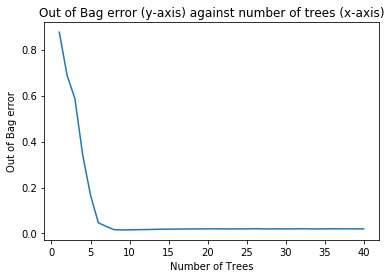

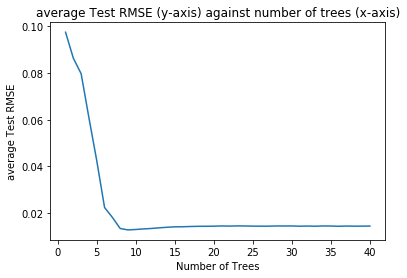

In [43]:
j = 0;
total_rmse_per_fold_train = []
total_rmse_per_fold_test = []
total_oob_error_per_fold = []
while j < len(depth_array):
    depth_trees = depth_array[j]
    model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = depth_trees, bootstrap = Bootstrap, oob_score=True)
    num_folds = 10
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    oob_error_per_fold = []
    k = 0
    for trainset, testset in kf.split(X_encoded):
        X_train, X_test = X_encoded[trainset], X_encoded[testset]
        y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
        model.fit(X_train, y_train)
#         rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#         rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
        rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
        oob_error = 1 - model.oob_score_
        oob_error_per_fold.append(oob_error)
    total_rmse_per_fold_train.append(np.sqrt(np.mean(rmse_per_fold_train)))
    total_rmse_per_fold_test.append(np.sqrt(np.mean(rmse_per_fold_test)))
    total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
    print('-----------------------------------------------------')
    print('Number of trees = %d' % Best_num_trees)
    print('Number of features = %d' % Best_num_features)
    print('Depth of trees = %d' % depth_trees)
    print('RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
    print('RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
    print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
    print('-----------------------------------------------------')
    j = j + 1
    
best_depth1 = np.argmin(total_oob_error_per_fold)
best_depth2 = np.argmin(total_rmse_per_fold_test)

plt.figure()
plt.plot(depth_array, total_oob_error_per_fold)
plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag error')

plt.figure()
plt.plot(depth_array, total_rmse_per_fold_test)
plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('average Test RMSE')    
    


In [44]:
best_depth1

8

In [45]:
best_depth2

8

## (2) iv

In [58]:
best_depth = 9

In [59]:
model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = best_depth, bootstrap = Bootstrap, oob_score=True)

model.fit(X_encoded,Y_encoded_rf)

imp_features = model.feature_importances_
print("Feature : Importance")
Feature_array = ['Day of Week', 'Work-Flow-ID', 'Backup Start Time - Hour of Day', 'Week #', 'File Name']
i = 0
while i < len(Feature_array):
    print("{} : {} ".format(Feature_array[i], imp_features[i]))
    i = i + 1

Feature : Importance
Day of Week : 0.2003304828258582 
Work-Flow-ID : 0.15255014055496707 
Backup Start Time - Hour of Day : 0.3973071764231535 
Week # : 0.0016387749909172358 
File Name : 0.24817342520510402 


In [60]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
oob_error_per_fold = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
    model.fit(X_train, y_train)
#     rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#     rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    oob_error = 1 - model.oob_score_
    oob_error_per_fold.append(oob_error)
    print('----------------------------------------------------')
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    print('Out of Bag error for fold {} = {}'.format(i, oob_error))
    print('----------------------------------------------------')
    i = i + 1

----------------------------------------------------
RMSE Training for fold 0 = 0.011545592413527367
RMSE Testing for fold 0 = 0.01292172896206365
Out of Bag error for fold 0 = 0.015493655624640112
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 1 = 0.011492735543325987
RMSE Testing for fold 1 = 0.013243555729311983
Out of Bag error for fold 1 = 0.015283163192968852
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 2 = 0.011639512991129102
RMSE Testing for fold 2 = 0.011759379802699293
Out of Bag error for fold 2 = 0.015468172007358394
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 3 = 0.011569296111909664
RMSE Testing for fold 3 = 0.012822667785886165
Out of Bag error for fold 3 = 0.015850351319370737
----------------------------------------------

In [61]:
print('Average RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
print('Average RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
print('Average Out of Bag Error = {}'.format(np.mean(oob_error_per_fold)))

Average RMSE Training = 0.011555122320439731
Average RMSE Testing = 0.012841096066080918
Average Out of Bag Error = 0.015421519351575074


## Scatter Plots

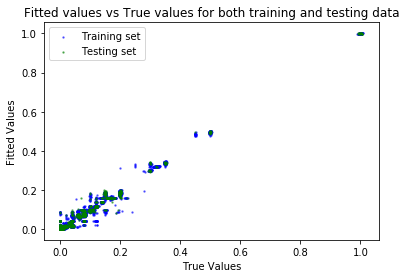

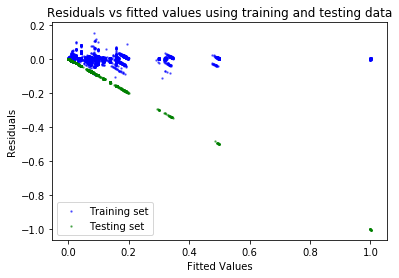

In [64]:
# reference: https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded_rf, test_size=0.1, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)

plt.title('Fitted values vs True values for both training and testing data')
plt.ylabel('Fitted Values')
plt.xlabel('True Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)

plt.title('Residuals vs fitted values using training and testing data')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)



## (2) v

In [69]:
# reference: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

from sklearn.tree import export_graphviz
import os

X_vis = df[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
Y_vis = df['Size of Backup (GB)']

model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = 4)

model.fit(X_encoded,Y_encoded_rf)

estimator = model.estimators_[0]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_vis.columns,
                class_names = Y_vis,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


## Neural Network

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def model_scatter_plots(model, X_train, y_train, X_test, y_test):

    # Fitted values vs true values
    plt.figure()
    plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Fitted values vs True values for both training and testing data')
    # plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()

    plt.figure()
    # Residuals vs Fitted values
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Residual plot using training and testing data')
    plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()
    # predicted_Y = nn.predict(X_encoded)

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


In [ ]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)
# print(enc.categories_)
# print(np.shape(enc.get_feature_names()))
# print(enc.get_feature_names())

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_relu = []
avg_test_rmses_relu = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_relu.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_relu.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_logistic = []
avg_test_rmses_logistic = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='logistic', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_logistic.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_logistic.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_tanh = []
avg_test_rmses_tanh = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='tanh', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_tanh.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_tanh.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
plt.figure()
plt.plot(layer_sizes, avg_test_rmses_relu)
plt.plot(layer_sizes, avg_test_rmses_logistic)
plt.plot(layer_sizes, avg_test_rmses_tanh)
plt.legend(['relu', 'logistic', 'tanh'])
plt.xlabel('hidden layer size')
plt.ylabel('average test RMSE')
plt.show()

In [ ]:
print('Best combination: {} hidden layers with ReLU gives RMSE {}'.format(layer_sizes[np.argmin(avg_test_rmses_relu)], 
                                                                          np.min(avg_test_rmses_relu)))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
best_layer_size = 400
best_activation = 'relu'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(enc.transform(train_data), target_data, 
                                                    test_size=0.1, random_state=0)

nn = MLPRegressor(hidden_layer_sizes=(best_layer_size,), activation=best_activation, random_state=0)
nn.fit(X_train, y_train)

model_scatter_plots(nn, X_train, y_train, X_test, y_test)

## Predicting backup sizes for each workflow

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


#### Linear Regression

In [ ]:
data_wf0_enc = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_enc = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_enc = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_enc = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_enc = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_enc = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_enc = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_enc = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_enc = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_enc = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
def analyze_wf_se_lr(data, target):

    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    for trainset, testset in kf.split(data):
        X_train, X_test = data[trainset], data[testset]
        y_train, y_test = target[trainset], target[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    #     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    #     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    #     print(' ')
    print('Average train RMSE:', np.sqrt(np.mean(rmse_per_fold_train)))
    print('Average test RMSE:', np.sqrt(np.mean(rmse_per_fold_test)))

In [ ]:
# Workflow 0

analyze_wf_se_lr(data_wf0_enc, target_wf0_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 1

analyze_wf_se_lr(data_wf1_enc, target_wf1_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 2

analyze_wf_se_lr(data_wf2_enc, target_wf2_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 3

analyze_wf_se_lr(data_wf3_enc, target_wf3_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 4

analyze_wf_se_lr(data_wf4_enc, target_wf4_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

#### Polynomial fit

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Get scalar-encoded data per workflow

data_wf0_se = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_se = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_se = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_se = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_se = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_se = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_se = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_se = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_se = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_se = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
# Get data per workflow to be used in one-hot encoding

data_wf0 = train_data[np.where(train_data[:,3]=='work_flow_0')]
target_wf0 = target_data[np.where(train_data[:,3]=='work_flow_0')]
data_wf1 = train_data[np.where(train_data[:,3]=='work_flow_1')]
target_wf1 = target_data[np.where(train_data[:,3]=='work_flow_1')]
data_wf2 = train_data[np.where(train_data[:,3]=='work_flow_2')]
target_wf2 = target_data[np.where(train_data[:,3]=='work_flow_2')]
data_wf3 = train_data[np.where(train_data[:,3]=='work_flow_3')]
target_wf3 = target_data[np.where(train_data[:,3]=='work_flow_3')]
data_wf4 = train_data[np.where(train_data[:,3]=='work_flow_4')]
target_wf4 = target_data[np.where(train_data[:,3]=='work_flow_4')]

In [ ]:
# Define functions to get RMSE's for scalar and one-hot encoded data, with polynomial features.

def analyze_wf_se_poly(data, target, model):

    avg_train_rmse_se = []
    avg_test_rmse_se = []
    for d in degrees:
#         model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_se_poly = pf.fit_transform(data)

        rmse_per_fold_train_se = []
        rmse_per_fold_test_se = []

        for trainset, testset in kf.split(data_se_poly):
            X_train, X_test = data_se_poly[trainset], data_se_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_se.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test_se.append(mean_squared_error(y_test, model.predict(X_test)))

        avg_train_rmse_se.append(np.sqrt(np.mean(rmse_per_fold_train_se)))
        avg_test_rmse_se.append(np.sqrt(np.mean(rmse_per_fold_test_se)))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (scalar):', np.sqrt(np.mean(rmse_per_fold_train_se)))
        print('Average test RMSE (scalar):', np.sqrt(np.mean(rmse_per_fold_test_se)))
        print(' ')
        
    return avg_train_rmse_se, avg_test_rmse_se
        
def analyze_wf_oh_poly(data, target, model, enc):
    avg_train_rmse_oh = []
    avg_test_rmse_oh = []
    data_oh = enc.transform(data)
    for d in degrees:
        model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_oh_poly = pf.fit_transform(data_oh)

        rmse_per_fold_train_oh = []
        rmse_per_fold_test_oh = []

        for trainset, testset in kf.split(data_oh_poly):
            X_train, X_test = data_oh_poly[trainset], data_oh_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_oh.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test_oh.append(mean_squared_error(y_test, model.predict(X_test)))

        avg_train_rmse_oh.append(np.sqrt(np.mean(rmse_per_fold_train_oh)))
        avg_test_rmse_oh.append(np.sqrt(np.mean(rmse_per_fold_test_oh)))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (one hot):', np.sqrt(np.mean(rmse_per_fold_train_oh)))
        print('Average test RMSE (one hot):', np.sqrt(np.mean(rmse_per_fold_test_oh)))
        print(' ')
    return avg_train_rmse_oh, avg_test_rmse_oh

In [ ]:
degrees = np.arange(2, 11)

enc = OneHotEncoder()
enc.fit(train_data)

In [ ]:
# Workflow 0 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf0_se, avg_test_rmse_wf0_se = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

In [ ]:
# Workflow 0 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf0_oh, avg_test_rmse_wf0_oh = analyze_wf_oh_poly(data_wf0, target_wf0, model, enc)

In [ ]:
# Workflow 1 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf1_se, avg_test_rmse_wf1_se = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

In [ ]:
# Workflow 1 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf1_oh, avg_test_rmse_wf1_oh = analyze_wf_oh_poly(data_wf1, target_wf1, model, enc)

In [ ]:
# Workflow 2 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf2_se, avg_test_rmse_wf2_se = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

In [ ]:
# Workflow 2 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf2_oh, avg_test_rmse_wf2_oh = analyze_wf_oh_poly(data_wf2, target_wf2, model, enc)

In [ ]:
# Workflow 3 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf3_se, avg_test_rmse_wf3_se = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

In [ ]:
# Workflow 3 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf3_oh, avg_test_rmse_wf3_oh = analyze_wf_oh_poly(data_wf3, target_wf3, model, enc)

In [ ]:
# Workflow 4 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf4_se, avg_test_rmse_wf4_se = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

In [ ]:
# Workflow 4 - one hot encoded

avg_train_rmse_wf4_oh, avg_test_rmse_wf4_oh = analyze_wf_oh_poly(data_wf4, target_wf4, enc)

In [ ]:
# Plot RMSE vs polynomial degree, scalar encoding

plt.figure()
plt.plot(degrees, avg_train_rmse_wf0)
plt.plot(degrees, avg_train_rmse_wf1)
plt.plot(degrees, avg_train_rmse_wf2)
plt.plot(degrees, avg_train_rmse_wf3)
plt.plot(degrees, avg_train_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0)
plt.plot(degrees, avg_test_rmse_wf1)
plt.plot(degrees, avg_test_rmse_wf2)
plt.plot(degrees, avg_test_rmse_wf3)
plt.plot(degrees, avg_test_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [ ]:
# Plot RMSE vs polynomial degree, one hot encoding

plt.figure()
plt.plot(degrees, avg_train_rmse_wf0_oh)
plt.plot(degrees, avg_train_rmse_wf1_oh)
plt.plot(degrees, avg_train_rmse_wf2_oh)
plt.plot(degrees, avg_train_rmse_wf3_oh)
plt.plot(degrees, avg_train_rmse_wf4_oh)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0_oh)
plt.plot(degrees, avg_test_rmse_wf1_oh)
plt.plot(degrees, avg_test_rmse_wf2_oh)
plt.plot(degrees, avg_test_rmse_wf3_oh)
plt.plot(degrees, avg_test_rmse_wf4_oh)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [ ]:
best_deg = 8


In [ ]:
# Workflow 0

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf0_enc_poly = pf.fit_transform(data_wf0_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc_poly, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 1

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf1_enc_poly = pf.fit_transform(data_wf1_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc_poly, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 2

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf2_enc_poly = pf.fit_transform(data_wf2_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc_poly, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 3

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf3_enc_poly = pf.fit_transform(data_wf3_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc_poly, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 4

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf4_enc_poly = pf.fit_transform(data_wf4_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc_poly, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
model = Lasso()

avg_train_rmse_wf0_se_lasso, avg_test_rmse_wf0_se_lasso = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf1_se_lasso, avg_test_rmse_wf1_se_lasso = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf2_se_lasso, avg_test_rmse_wf2_se_lasso = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf3_se_lasso, avg_test_rmse_wf3_se_lasso = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf4_se_lasso, avg_test_rmse_wf4_se_lasso = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

In [ ]:
plt.figure()
plt.plot(degrees, avg_train_rmse_wf0_se_lasso)
plt.plot(degrees, avg_train_rmse_wf1_se_lasso)
plt.plot(degrees, avg_train_rmse_wf2_se_lasso)
plt.plot(degrees, avg_train_rmse_wf3_se_lasso)
plt.plot(degrees, avg_train_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average training RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0_se_lasso)
plt.plot(degrees, avg_test_rmse_wf1_se_lasso)
plt.plot(degrees, avg_test_rmse_wf2_se_lasso)
plt.plot(degrees, avg_test_rmse_wf3_se_lasso)
plt.plot(degrees, avg_test_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average testing RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values

In [ ]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)

In [ ]:
# One hot encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

avg_train_rmse_oh = []
avg_test_rmse_oh = []

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(train_data):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(enc.transform(train_data[trainset]), target_data[trainset])

        predicted_test = knr.predict(enc.transform(train_data[testset]))
        predicted_train = knr.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmse_oh.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmse_oh.append(np.sqrt(np.mean(test_rmses)))
    

In [ ]:
# Scalar encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

avg_train_rmse_se = []
avg_test_rmse_se = []

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(X_encoded):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(X_encoded[trainset], Y_encoded[trainset])

        predicted_test = knr.predict(X_encoded[testset])
        predicted_train = knr.predict(X_encoded[trainset])
        
        train_rmses.append(mean_squared_error(Y_encoded[trainset], predicted_train))
        test_rmses.append(mean_squared_error(Y_encoded[testset], predicted_test))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmse_se.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_se.append(np.sqrt(np.mean(test_rmses)))
    

In [ ]:
knr = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.1, random_state=0)
knr.fit(X_train, y_train)

model_scatter_plots(knr, X_train, y_train, X_test, y_test)

In [ ]:
plt.figure()
plt.plot(num_neighbors, avg_train_rmse_se)
plt.plot(num_neighbors, avg_test_rmse_se)
plt.xlabel('num neighbors')
plt.ylabel('rmse')
plt.title('Average RMSE for scalar encoding')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.figure()
plt.plot(num_neighbors, avg_train_rmse_oh)
plt.plot(num_neighbors, avg_test_rmse_oh)
plt.xlabel('num neighbors')
plt.ylabel('rmse')
plt.title('Average RMSE for scalar encoding')
plt.legend(['train', 'test'])
plt.show()